### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import spacy
import nltk
import string
import re
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import sklearn.metrics as metrics

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from time import time

### Load spacy library path

In [8]:
nlp = spacy.load(r'C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\en_core_web_sm\en_core_web_sm-3.5.0')


### create a dataframe by using csv file

In [9]:
df = pd.read_csv('toxic_tweets.csv', usecols = ['Toxicity', 'tweet'])

In [10]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### Text preprocessing

In [75]:
def preprocess(text):

    stop_words = ENGLISH_STOP_WORDS
    lemmatizer = WordNetLemmatizer()
    
    doc = nlp(text)
    sentences = [sentence for sentence in doc]
    word_tokens = [word for word in sentences]
    ents = [ent.text for ent in doc.ents]

    ents_word = []
    for item in doc:
        if item.text in ents:
            pass 
        else:
            ents_word.append(item.text) 
        
    doc = (''.join(str(ents_word)))
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    doc = doc.lower().strip()
    doc = ''.join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = ' '.join([token for token in doc.split() if token not in stop_words])
    doc = ''.join([lemmatizer.lemmatize(word) for word in doc])
    
    return doc

#### Creating new column 

In [79]:
df['ready_tweet'] = df.tweet.apply(preprocess)

In [80]:
df.head()

,Toxicity,tweet,ready_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca nt use cause n...
2,0,bihday your majesty,majesty
3,0,#model i love u take with u all the time in ...,model love u u time urxfx xfxxxfxxexfxxxfx x x...
4,0,factsguide: society now #motivation,factsguide society motivation


In [81]:
df['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [82]:
df['ready_tweet'][3]

'model love u u time urxfx xfxxxfxxexfxxxfx x xfx xfx xfx'

#### Save latest dataframe as csv file 

In [83]:
df.to_csv('tweets.csv')

In [300]:
df = df.dropna()

In [301]:
len(df)

56721

In [5]:
df = pd.read_csv('tweets.csv', usecols = ['Toxicity', 'tweet', 'ready_tweet'])

In [6]:
df.head()

,Toxicity,tweet,ready_tweet
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit ca nt use cause n...
2,0,bihday your majesty,majesty
3,0,#model i love u take with u all the time in ...,model love u u time urxfx xfxxxfxxexfxxxfx x x...
4,0,factsguide: society now #motivation,factsguide society motivation


In [8]:
df = df.dropna()

In [9]:
len(df)

56721

### Converting text to number representation by using TfidfVectorizer

In [10]:
tf = TfidfVectorizer()
x = tf.fit_transform(df['ready_tweet'])
y = df['Toxicity']



### Train test split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39704, 63338)
(39704,)
(17017, 63338)
(17017,)


### Creating a function/module to run our ml models

In [14]:
def model(model, x_train, x_test, y_train, y_test, model_type=1):
    %time model.fit(x_train,y_train)
    print(model)
    
    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)
    print('\nTraining Score  : ', accuracy_score(y_train, y_train_pred))
    print('Testing Score   : ', accuracy_score(y_test, y_test_pred))
    print('Precision Score : ', precision_score(y_test, y_test_pred))
    print('Recall Score    : ', recall_score(y_test, y_test_pred))
    print('F1 Score        : ', f1_score(y_test, y_test_pred))
     
    y_pred = model.predict(x_test)
    print('\nClassification Report')
    print(classification_report(y_test, y_pred))
    
    print('\nConfusion Matrix')
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('paper', font_scale=2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    if model_type == 1:
        probs = lr.predict_proba(x_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        auc_curve = metrics.auc(fpr, tpr)
        
        plt.figure(figsize=(10,10))
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, label = 'AUC = %.1f' % auc_curve)
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='best')
        plt.show()

### MODELS 

CPU times: total: 688 ms
Wall time: 683 ms
LogisticRegression()

Training Score  :  0.9485946000402982
Testing Score   :  0.9314215196568137
Precision Score :  0.9661382176389103
Recall Score    :  0.8689091915836102
F1 Score        :  0.9149478900954741

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9793
           1       0.97      0.87      0.91      7224

    accuracy                           0.93     17017
   macro avg       0.94      0.92      0.93     17017
weighted avg       0.93      0.93      0.93     17017


Confusion Matrix


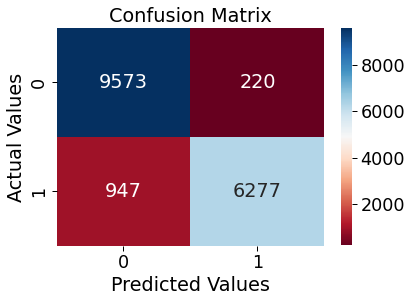

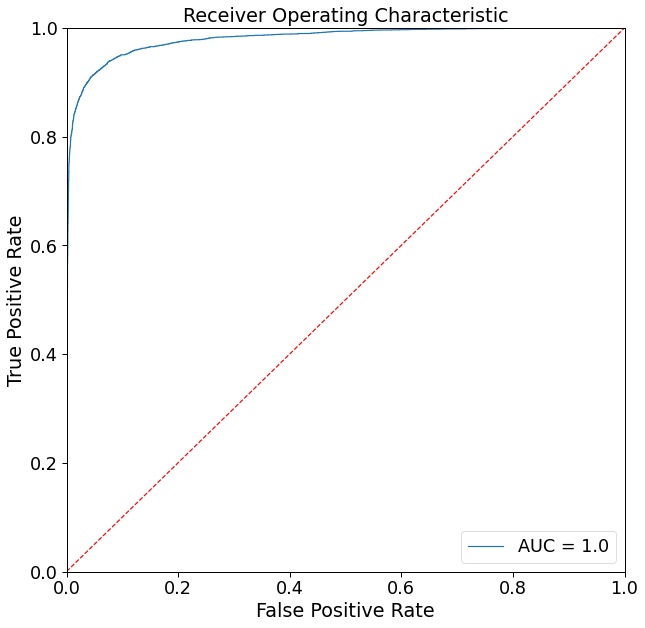




CPU times: total: 52.8 s
Wall time: 53.3 s
DecisionTreeClassifier()

Training Score  :  0.9997733225871449
Testing Score   :  0.928542046189105
Precision Score :  0.9225035161744023
Recall Score    :  0.9079457364341085
F1 Score        :  0.9151667364308637

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      9793
           1       0.92      0.91      0.92      7224

    accuracy                           0.93     17017
   macro avg       0.93      0.93      0.93     17017
weighted avg       0.93      0.93      0.93     17017


Confusion Matrix


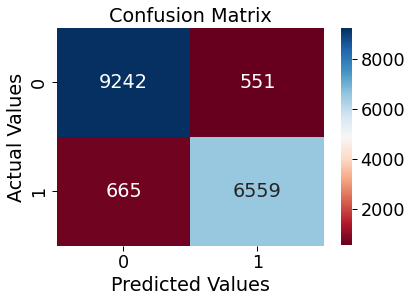

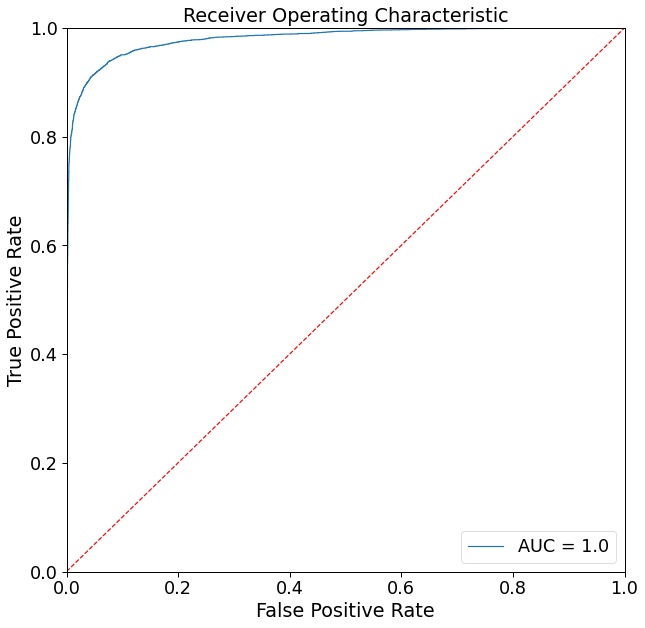




CPU times: total: 11min 45s
Wall time: 12min 11s
RandomForestClassifier()

Training Score  :  0.9997481362079388
Testing Score   :  0.9356525827114063
Precision Score :  0.9408718170047475
Recall Score    :  0.9053156146179402
F1 Score        :  0.9227513227513228

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9793
           1       0.94      0.91      0.92      7224

    accuracy                           0.94     17017
   macro avg       0.94      0.93      0.93     17017
weighted avg       0.94      0.94      0.94     17017


Confusion Matrix


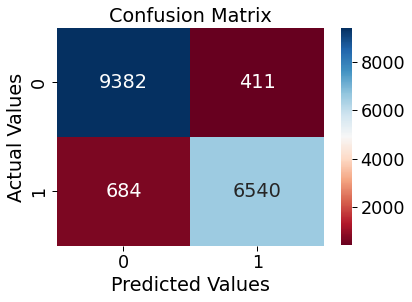

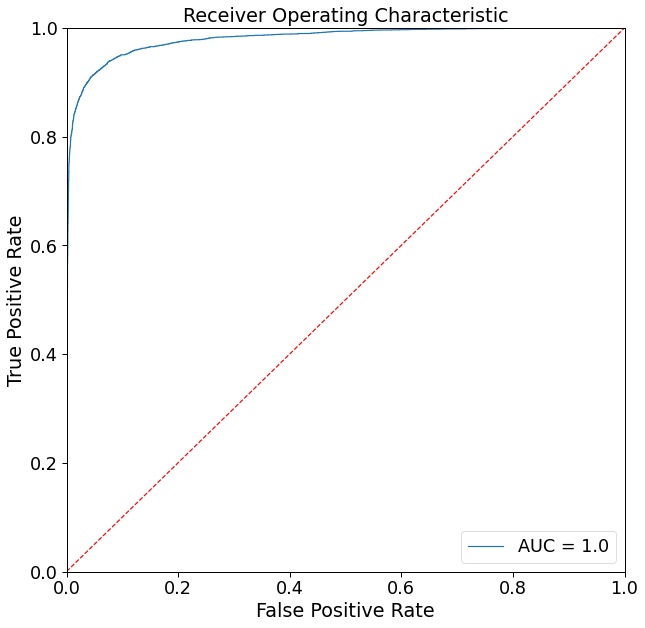




CPU times: total: 31.2 ms
Wall time: 25.4 ms
MultinomialNB()

Training Score  :  0.9566290550070522
Testing Score   :  0.9192572133748604
Precision Score :  0.9088621750069891
Recall Score    :  0.9000553709856035
F1 Score        :  0.9044373348170817

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9793
           1       0.91      0.90      0.90      7224

    accuracy                           0.92     17017
   macro avg       0.92      0.92      0.92     17017
weighted avg       0.92      0.92      0.92     17017


Confusion Matrix


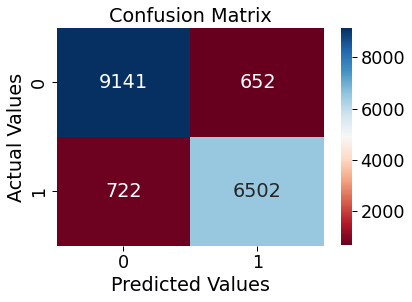

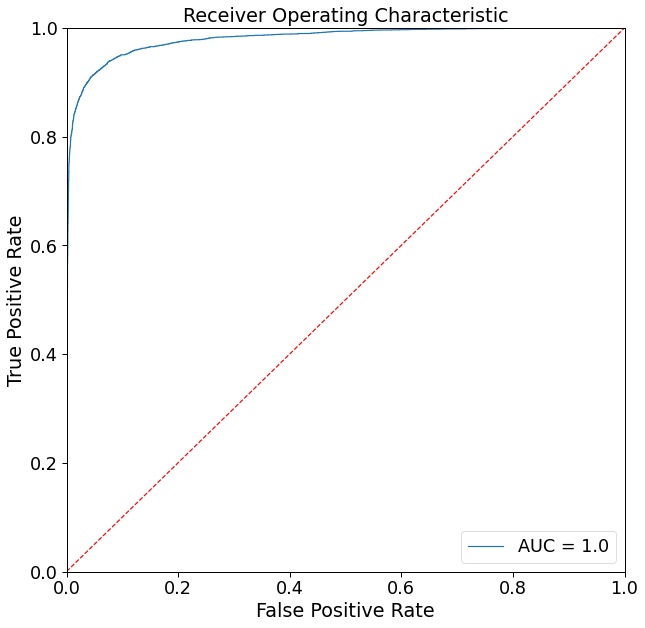




CPU times: total: 0 ns
Wall time: 7.5 ms
KNeighborsClassifier()

Training Score  :  0.632832963933105
Testing Score   :  0.6167949697361462
Precision Score :  0.9443742098609356
Recall Score    :  0.10340531561461794
F1 Score        :  0.18640049906425452

Classification Report
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      9793
           1       0.94      0.10      0.19      7224

    accuracy                           0.62     17017
   macro avg       0.77      0.55      0.47     17017
weighted avg       0.75      0.62      0.51     17017


Confusion Matrix


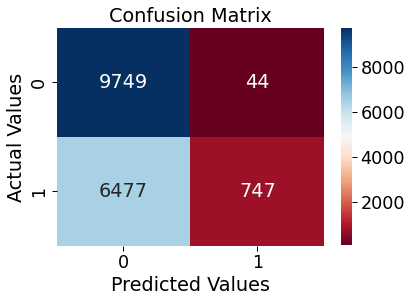

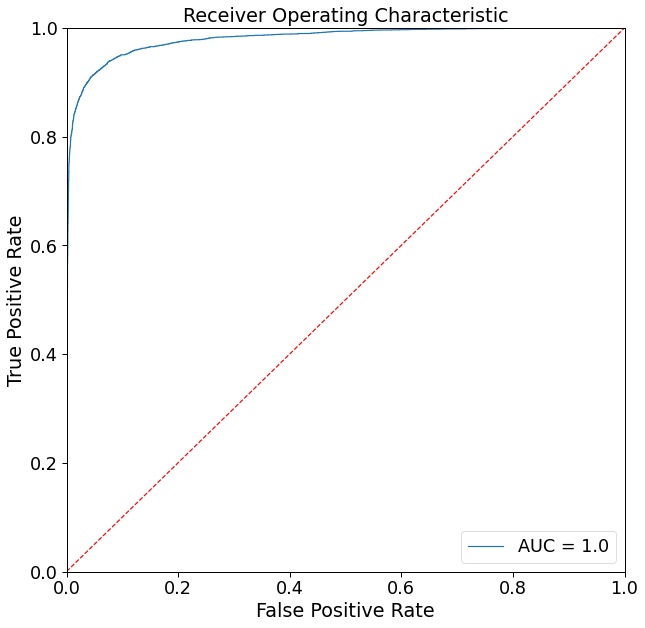




CPU times: total: 266 ms
Wall time: 284 ms
LinearSVC()

Training Score  :  0.9926707636510176
Testing Score   :  0.9431744725862373
Precision Score :  0.9610906411201179
Recall Score    :  0.9026854928017719
F1 Score        :  0.9309729459633094

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9793
           1       0.96      0.90      0.93      7224

    accuracy                           0.94     17017
   macro avg       0.95      0.94      0.94     17017
weighted avg       0.94      0.94      0.94     17017


Confusion Matrix


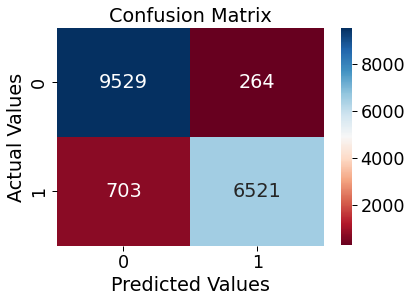

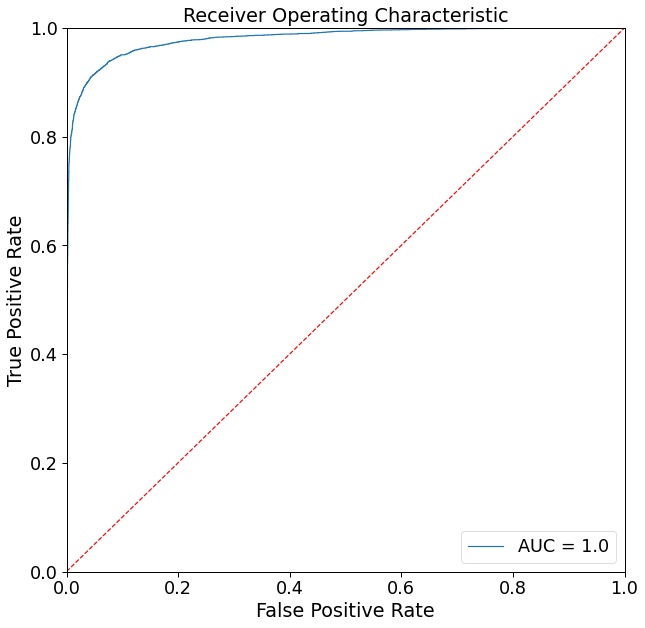

In [15]:
lr = LogisticRegression()
model(lr, x_train, x_test, y_train, y_test)
print('\n\n')
tree = DecisionTreeClassifier()
model(tree, x_train, x_test, y_train, y_test)
print('\n\n')
rf = RandomForestClassifier()
model(rf, x_train, x_test, y_train, y_test)
print('\n\n')
mnnb = MultinomialNB()
model(mnnb, x_train, x_test, y_train, y_test)
print('\n\n')
knn = KNeighborsClassifier()
model(knn, x_train, x_test, y_train, y_test)
print('\n\n')
svm = LinearSVC()
model(svm, x_train, x_test, y_train, y_test)
